## Prerequisites


In [1]:
import dotenv

dotenv.load_dotenv()

True

In [ ]:
project_name = "language_ja"
encoder_id = "mert_v1_95m"


# data preparation
target_column = "language"
target_positive_class = "ja"


## 1. Train Multiple CAVs for Significance Test


In [ ]:
# training meta parameters
num_train_runs = 100
training_sample_count = 200


# training parameters
epochs = 500
batch_size = training_sample_count
learning_rate = 0.002
embedding_dim = 768
dropout_rate = 0.0

### Prepare Data


In [4]:
import os

import pandas as pd
import s3fs
from cavmir.training.dataset import (
    create_dataloader_from_webdataset_path,
    create_webdataset,
)
from cavmir.utils import (
    append_embeddings_to_df,
    create_training_samples_from_df,
    train_one_cav,
    store_cav_vector_array,
    store_evaluation_metrics,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


In [5]:
# load training set
df = pd.read_csv(os.path.join(dataset_prefix, f"train_dataset_{project_name}.csv"))
df = append_embeddings_to_df(df, embedding_prefix, encoder_id, s3)

In [6]:
# create test set for evaluation
df_test = pd.read_csv(os.path.join(dataset_prefix, f"test_dataset_{project_name}.csv"))
df_test = append_embeddings_to_df(df_test, embedding_prefix, encoder_id, s3)

create_webdataset(
    create_training_samples_from_df(df_test),
    f"datasets/{encoder_id}_test_{project_name}.tar",
)

test_dataloader = create_dataloader_from_webdataset_path(
    f"datasets/{encoder_id}_test_{project_name}.tar", batch_size=batch_size
)

### Training


In [7]:
%%time

cav_vectors = []
evaluation_metrics = []

for i in range(num_train_runs):
    print(f"Training run {i + 1}/{num_train_runs}")

    cav_vector, evaluation_metric = train_one_cav(
        train_index=i + 1,
        df=df,
        project_name=project_name,
        encoder_id=encoder_id,
        target_positive_class=target_positive_class,
        training_sample_count=training_sample_count,
        epochs=epochs,
        batch_size=batch_size,
        learning_rate=learning_rate,
        embedding_dim=embedding_dim,
        dropout_rate=dropout_rate,
        test_dataloader=test_dataloader,
    )

    cav_vectors.append(cav_vector)
    evaluation_metrics.append(evaluation_metric)


store_cav_vector_array(cav_vectors, f"cav_ttest_{project_name}.npy", project_name)
store_evaluation_metrics(
    evaluation_metrics, f"evaluation_metrics_ttest_{project_name}.json", project_name
)


Training run 1/10
100 100
Epoch 1/500
Epoch 1 Train Loss: 0.6984
Epoch 1 Validation Loss: 0.6875
Model saved to trainings/singer_age_decade_40/state_dict.pth


KeyboardInterrupt: 

## 2. Train CAV for Qualitative Tests


In [8]:
train_val_split = 0.9

# training parameters
epochs = 500
batch_size = 128
learning_rate = 0.002
embedding_dim = 768
dropout_rate = 0.0

### Prepare Data


In [9]:
import os

import pandas as pd
import s3fs
from cavmir.training.dataset import (
    create_dataloader_from_webdataset_path,
    create_webdataset,
)
from cavmir.utils import (
    append_embeddings_to_df,
    create_training_samples_from_df,
    train_one_cav,
    store_cav_vector_array,
    store_evaluation_metrics,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


In [12]:
# load training set
df = pd.read_csv(os.path.join(dataset_prefix, f"train_dataset_{project_name}.csv"))
df = append_embeddings_to_df(df, embedding_prefix, encoder_id, s3)

training_sample_count = int(len(df) * train_val_split)
validation_sample_count = len(df) - training_sample_count


In [14]:
validation_sample_count

30

In [15]:
# create test set for evaluation
df_test = pd.read_csv(os.path.join(dataset_prefix, f"test_dataset_{project_name}.csv"))
df_test = append_embeddings_to_df(df_test, embedding_prefix, encoder_id, s3)

create_webdataset(
    create_training_samples_from_df(df_test),
    f"datasets/{encoder_id}_test_{project_name}.tar",
)

test_dataloader = create_dataloader_from_webdataset_path(
    f"datasets/{encoder_id}_test_{project_name}.tar", batch_size=batch_size
)

### Training


Epoch 1/500
Epoch 1 Train Loss: 0.6883
Epoch 1 Validation Loss: 0.6925
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.5555
Epoch 11 Validation Loss: 0.6279
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.4897
Epoch 21 Validation Loss: 0.5947
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.4445
Epoch 31 Validation Loss: 0.5724
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4106
Epoch 41 Validation Loss: 0.5581
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.3836
Epoch 51 Validation Loss: 0.5484
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.3613
Epoch 61 Validation Loss: 0.5412
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.3422
Epoch 71 Validati

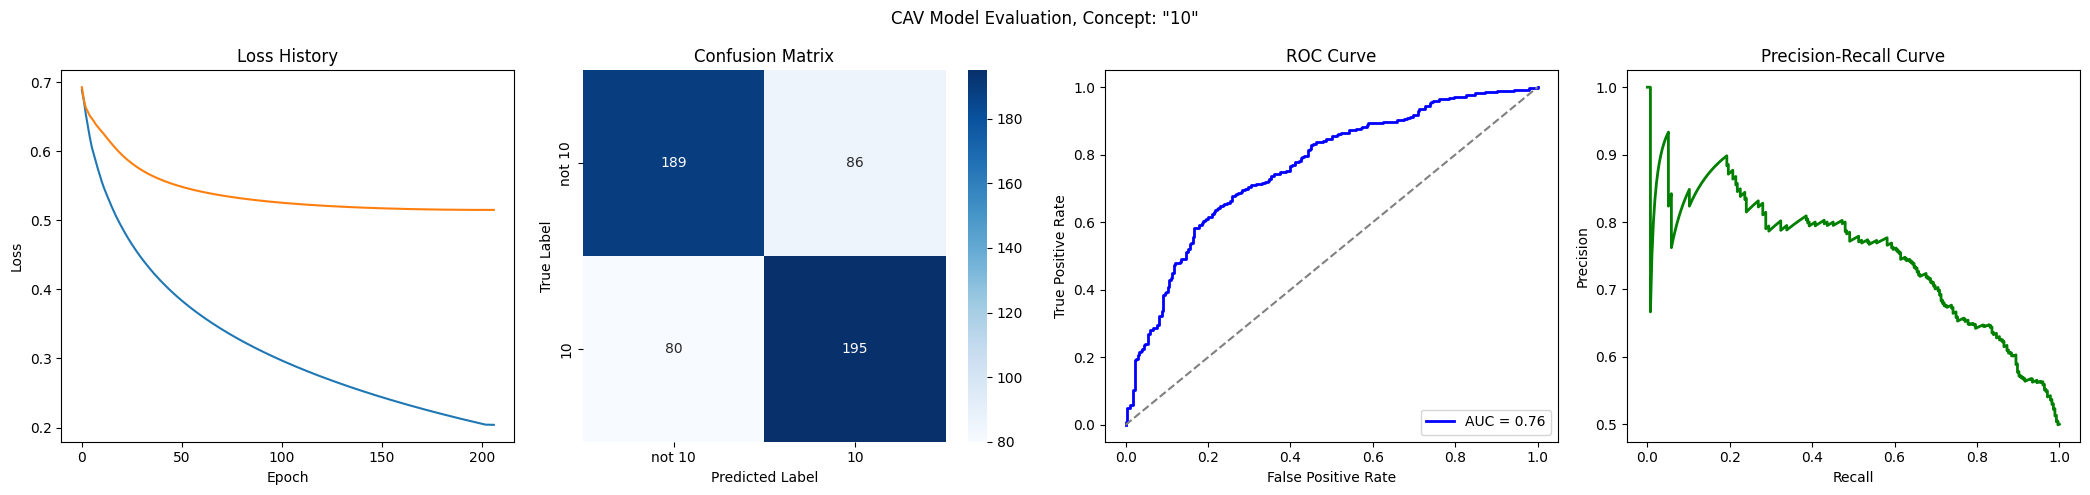

Epoch 1/500
Epoch 1 Train Loss: 0.6898
Epoch 1 Validation Loss: 0.6843
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.5717
Epoch 11 Validation Loss: 0.6182
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5016
Epoch 21 Validation Loss: 0.5896
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.4533
Epoch 31 Validation Loss: 0.5738
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4172
Epoch 41 Validation Loss: 0.5627
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.3886
Epoch 51 Validation Loss: 0.5538
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.3651
Epoch 61 Validation Loss: 0.5464
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.3451
Epoch 71 Validati

KeyboardInterrupt: 

In [ ]:
cav_vector, evaluation_metric = train_one_cav(
    train_index=0,
    df=df,
    project_name=project_name,
    encoder_id=encoder_id,
    target_positive_class=target_positive_class,
    training_sample_count=training_sample_count,
    validation_sample_count=validation_sample_count,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=learning_rate,
    embedding_dim=embedding_dim,
    dropout_rate=dropout_rate,
    test_dataloader=test_dataloader,
)


store_cav_vector_array(cav_vector, f"cav_full_{project_name}.npy", project_name)
store_evaluation_metrics(
    evaluation_metric, f"evaluation_metrics_full_{project_name}.json", project_name
)
